# Исследование данных о российском кинопрокате



# Цель исследования

Изучение рынка российского кинопроката и выявление текущих тренды. Анализ восстребованности у зрителей фильмов, получивших государственную поддержку. 

**Входные данные**

Данные, опубликованные на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

Пути к файлам: 
/datasets/mkrf_movies.csv — данные о прокатных удостоверениях. 

/datasets/mkrf_shows.csv — данные о прокате в российских кинотеатрах. 

Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 
1. title — название фильма;
2. puNumber — номер прокатного удостоверения;
3. show_start_date — дата премьеры фильма;
4. type — тип фильма;
5. film_studio — студия-производитель;
6. production_country — страна-производитель;
7. director — режиссёр;
8. producer — продюсер;
9. age_restriction — возрастная категория;
10. refundable_support — объём возвратных средств государственной поддержки;
11. nonrefundable_support — объём невозвратных средств государственной поддержки;
12. financing_source — источник государственного финансирования;
13. budget — общий бюджет фильма;
14. ratings — рейтинг фильма на КиноПоиске;
15. genres — жанр фильма.

Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
1. puNumber — номер прокатного удостоверения;
2. box_office — сборы в рублях.

**Ход исследования**
1. Обзор данных:

- Импортирование необходимых библиотек.
- Чтение файлов с данными.
- Общий обзор информации.
- Объеденение данных в один датафрейм
  
2. Предобработка данных:

- Приведение именования столбоц к общей стилистике.
- Проверка на пропущенные значения и их заполнение или удаление.
- Удаление дубликатов.
- Преобразование типов данных (например, приведение дат к единому формату).
- Обработка выбросов и аномалий (например, нереально высокие или низкие цены).
- Создание новых признаков.

3. Исследовательский анализ данных (EDA):

- Анализ количества выщедших в прокат фильмов Российского и зарубежного производства.
- Анализ сборов по годам
- Анализ кассовых сборов и фильмов по годам
- Анализ средней и медианной суммы для каждого года

4. Исследование фильмов с господдержкой
- Общий анализ господдержки
- Анализ окупаемости фильмов с господдержкой
- Анализ рейтинга фильмов с господдержкой
- Анализ распределения по жанрам среди фильмов с господдержкой

5. Формирование выводов:

- Общий вывод по исследованию российского кинопроката и господдержки фильмов (2010–2019)




# Обзор данных

## Импорт библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_theme(style="darkgrid")

## Считаем данные из csv-файлов в датафреймы

In [2]:
try:
    data_movies = pd.read_csv('/datasets/mkrf_movies.csv')
    data_shows = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    data_movies = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')
    data_shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

## Ознакомимся с данными из каждого датафрейма

### Данные data_movies

In [3]:
# Просмотр первых 5 строк
data_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


### Общая информация data_movies

In [4]:
# Вывод общей информации
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

В стобцах puNumber, show_start_date, ratings неверно указан тип данных. Также необходимо привести название puNumber к общей стилистике. В некоторых столбцах есть пропущенные значения.

### Данные data_shows

In [5]:
# Первые 5 строк data_shows 
data_shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


### Общая информация data_shows

In [6]:
# Вывод общей информации
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


data_shows не содержит пропусков, что говорит о полноте данных.

## Объеденим файлы с данными в один датафрейм. 


В таблице data_movies столбец puNumber имеет тип object, а в таблице data_shows тип int64. Будем объединять таблицы по этому столбцу. Для начала попробуем перевести тип данных puNumber датафрейма data_movies в int64. Строки, которые нельзя преобразовать в число могут вызвать ошибку.

### Изменение типа данных puNumber датафрейма data_movies на int64

In [7]:
# Удаление лишних пробелов в строках
data_movies['puNumber'] = data_movies['puNumber'].str.strip()

#Проверяем значения, которые нельзя преобразовать в int64
invalid_pu_numbers = data_movies[~data_movies['puNumber'].str.isnumeric()]

print(f"Некорректные значения в puNumber: {invalid_pu_numbers['puNumber'].unique()}")

# Убираем строки с некорректными значениями
data_movies = data_movies[data_movies['puNumber'].str.isnumeric()]

# Преобразуем puNumber в int64
data_movies['puNumber'] = data_movies['puNumber'].astype('int64')

Некорректные значения в puNumber: ['нет']


Значение "нет", означает, что фильм не получил прокатное удостоверение. 

### Объединение данных

In [8]:
data = data_movies.merge(data_shows, on='puNumber', how='left')

# Просмотр объедененной таблицы
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


### Просмотр общей информации 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Данные объедененны корректно. Тип в puNumber изменен на целочисленный.

## Вывод
Мы просмотрели данные из 2 таблиц и объеденили их 1 датафрейм, обнаружили пропуски, некорректные типы данных и нарушение стилистики именования. Обработаем их на следующем этапе.

# Предобработка данных

## Приведем именование столбцов к общей стилистике

In [10]:
data = data.rename(columns={'puNumber': 'pu_number'})
data.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

Столбец puNumber был назван с нарушением стилистики. Переименовали его используя snake_case

## Изменим типы данных в столбцах show_start_date, ratings

### Преобразуем show_start_date в datetime

In [11]:
# Преобразуем show_start_date в datetime
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ', utc=True).dt.date

В show_start_date мы оставили только дату.

### Проверим значения в ratings

In [12]:
# Уникальные значения столбца ratings
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

В ratings хранятся значения от 0 до 10 и от 0% до 100%. 

### Преобразуем процентную шкалу в десятибальную

In [13]:
# Индексы строк, которые содержат '%' в значениях, запишем в percent_data_indexes
percent_indexes = data.loc[data['ratings'].str.contains('%').fillna(False)].index
# Убираем символ '%' из значений
data.loc[data['ratings'].index.isin(percent_indexes), 'ratings'] = data.loc[data['ratings'].index.isin(percent_indexes), 'ratings'].str.strip('%')
# Преобразуем все значения к типу float
data['ratings'] = data['ratings'].astype(float)
# Преобразуем процентные оценки в десятибальные, поделив значения на 10 
data.loc[data['ratings'].index.isin(percent_indexes), 'ratings'] = data.loc[data['ratings'].index.isin(percent_indexes), 'ratings'] / 10

data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

Оценки переведены в десятибальную систему. 

## Изучение пропусков в датафрейме

### Проверка количества пропусков в каждом столбце

In [14]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

**Пропуски в film_studio могут означать, что фильм не имеет официальную студию производства**


### Заполним пропуски в film_studio на "независимый проект"

In [15]:
data['film_studio'] = data['film_studio'].fillna('независимый проект')

### Проверим пропуски в production_country

In [16]:
data[data['production_country'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4440,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,независимый проект,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Пропуски могут быть связаны с ошибкой при сборе данных. Детский юмористический киножурнал "Ералаш" и Мульт личности были сняты в России. Заполним пропуски.

### Заполним пропуски в production_country

In [17]:
data['production_country'] = data['production_country'].fillna('Россия')

### Заполним пропуски в director

В независимых или любительских проектах режисер может быть не указан, также, это может быть ошибкой при вводе или сборе данных. Заполним пропуски значением "не указан"

In [18]:
data['director'] = data['director'].fillna('не указан')

### Заполним пропуски в producer

Независимые и авторские проекты могут не иметь независимого продюссера, а также низкобюджетные, документальные фильмы и фильмы снятые в СССР. Заполним пропуски значением "не указан"

In [19]:
data['producer'] = data['producer'].fillna('не указан')

Пропуски в столбцах:
- refundable_support
- nonrefundable_support
- budget
- financing_source
<br>

Пропуски означают об отсутствии госсударственной поддержки для большинства фильмов. Одинаковое значение пропусков у budget и остальных столбцов говорит о том, что только фильмы, получившие поддержку имеют данные о бюджете. 

- ratings
<br>

Возможно, рейтинг формируется после определенного количества оценок. Слишком малое количество людей поставили оценку, поэтому возникают пропуски. Пропуски заполним значением 0.0, которое будет обозначать отсутсвие рейтинга.

- genres
<br>

У некоторых проектов может быть неопределенный жанр или нельзя было выделить определенный. Также, может быть ошибка при заполнении. Заполним пропуски значением "не указан"

- box_office
<br>

Не все фильмы выходят в широкий прокат, некоторые могли провалиться в прокате и не собрать значительную сумму. Также, фильмы могут быть достсточно старыми и нет информации о сборах.
<br>
**Остальные пропуски оставим без изменений без изменений**

### Заполним пропуски в ratings на 0.0

In [20]:
data['ratings'] = data['ratings'].fillna(0.0)

### Заполним пропуски в genres на "не указан"

In [21]:
data['genres'] = data['genres'].fillna('не указан')

### Проверим уникальные значения в age_restriction и сократим их запись

In [22]:
# Выведем уникальные записи
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [23]:
# Сократим записи
age_shorten = {
    '«18+» - запрещено для детей': '18+',
    '«12+» - для детей старше 12 лет': '12+',
    '«16+» - для детей старше 16 лет': '16+',
    '«6+» - для детей старше 6 лет': '6+',
    '«0+» - для любой зрительской аудитории': '0+'
}

data.replace({'age_restriction': age_shorten}, inplace=True)
data['age_restriction'].unique()

array(['18+', '6+', '12+', '16+', '0+'], dtype=object)

## Изучение дубликатов в датафрейме

### Проверим количество явных дубликатов

In [24]:
data.duplicated().sum()

0

Явных дубликатов нет

### Проверим неявные дубликаты в title

In [25]:
data['title'].duplicated().sum()

714

Названия фильмов могут повторяться и один фильм мог быть в прокате несколько раз.

### Проверим неявные дубликаты в pu_number

In [26]:
data[data['pu_number'].duplicated()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",16+,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",12+,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


У фильмов с прокатными удоствоверениями  221154310 и 221054410 есть дубликаты. Выведем их.

In [27]:
data[(data['pu_number'] == 221154310) | (data['pu_number'] == 221054410)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",16+,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",16+,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",16+,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",12+,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Одинакового прокатного удостоверения у двух разных фильмов быть не может, т.к. оно уникально. Удалим эти записи. 

In [28]:
# Удалим дубликаты
data = data.drop(index=[4637, 4638, 5066, 5067])
data['pu_number'].duplicated().sum()

0

## Изучение категориальных значений

### Проверим неявные дубликаты в type

In [29]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

В некоторых значениях есть лишний пробел строкой.

### Удаление лишнего пробела в значениях столбца type

In [30]:
data['type'] = data['type'].str.strip()
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

### Проверка значений в title

In [31]:
sorted(data['title'].unique())

[' Я ПРЕПОД',
 '"SOS" над тайгой',
 '"V" значит вендетта',
 '"АРТиШОК" анимационный альманах авторских фильмов',
 '"Бежин луг" Сергея Эйзенштейна',
 '"Державная" Размышления 100 лет спустя',
 '"Зеленое яблоко" анимационный альманах выпуск № 7',
 '"Машины песенки". Серия "Опять Новый Год!"',
 '"Море"',
 '"Сезон дождей", "Диета Матроскина", "Шарик хочет телефон" из анимационного сериала "Простоквашино"',
 '"Старый" Новый год',
 '"Уорнер Бразерс Пикчерз" и "Леджендари Пикчерз": Тихоокеанский рубеж',
 '"Фееринки". Серия "Фантик спешит на помощь"',
 '"Хороший день", "Бог из машины/Deus EX", "Голод", "Психотроника", "Темная ночь"',
 '"Чудовище из Простоквашино", "Ген героя", "Ненастоящий детектив", "Мама и Тама", "Как бы не стало зимы" из анимационного сериала "Простоквашино"',
 '#ВСЁ_ИСПРАВИТЬ!?!',
 '#Москва-Руаян',
 '#ЯВОЛОНТЕР Истории неравнодушных',
 '(Не)жданный принц',
 '(Не)идеальный мужчина',
 '... в стиле JAZZ',
 '... и я там был',
 '... имени Сергея Герасимова',
 '007 Координаты Ск

Просмотрев часть данных стобца title видно, что некоторые названия написаны с лишними специальными символами и пробелами. Необходимо привести названия к общему формату. Удалим лишние специальные символы и пробелы в строках.

### Приводим названия фильмов к общему формату

In [32]:
# Функция для очистки названий
def clean_title(title):
    # Убираем точки в начале строки
    title = re.sub(r'^\.+', '', title)

    # Убираем точки в конце строки
    title = re.sub(r'\.+$', '', title)

    # Убираем символы "-" и "_" в конце строки
    title = re.sub(r'[-_]+$', '', title)

    # Убираем лишние пробелы по краям и между словами
    title = ' '.join(title.split())

    return title

# Применяем очистку
data['title'] = data['title'].apply(clean_title)

### Приводим значения в столбцах film_studio, production_country, director, producer, genres к общему формату

In [33]:
# Уберем лишние пробелы и спец-символы
params = ['film_studio', 'production_country', 'director', 'producer', 'genres']

for param in params:
    data[param] = data[param].str.strip(""" .,_-""")

### Промежуточный вывод

Общая проблема категориальных данных была в лишних пробелах. Также, мы привели к общему формату написание фильмов, студий, страны производства, продюссеров, режисеров и жанров, удалив лишние специальные символы.

## Проверка количественных значений

### Изменим вывод в box_office, budget, refundable_support, nonrefundable_support для удобства, разделив значения на 1000000

In [34]:
# Преобразуем указанные столбцы к формату целых чисел
columns_to_convert = ['box_office', 'budget', 'refundable_support', 'nonrefundable_support']

for col in columns_to_convert:
    # Преобразуем в миллионы, оставляя числовой формат
    data[col] = data[col] / 1e6
# Проверяем изменения
data[columns_to_convert].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7481 entries, 0 to 7484
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   box_office             3158 non-null   float64
 1   budget                 332 non-null    float64
 2   refundable_support     332 non-null    float64
 3   nonrefundable_support  332 non-null    float64
dtypes: float64(4)
memory usage: 292.2 KB


### Проверим, превышает ли объем средств государственной поддержки общий бюджет фильма

In [35]:
# Выведем, где сумма поддержки больше бюджета
data[(data['refundable_support'] + data['nonrefundable_support']) > data['budget']]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",16+,0.0,23.000000,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,10.234016
2057,Дуxless 2,111000415,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",16+,0.0,75.000000,0.0,Фонд кино,6.6,драма,446.163511
2471,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",12+,10.0,70.000000,0.0,Фонд кино,7.8,"боевик,драма,криминал",196.572438
2531,Бармен,111009615,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,16+,20.0,0.000000,0.0,Фонд кино,6.2,"комедия,фэнтези",67.418975
2614,Савва. Сердце воина,114001715,2015-07-21,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,6+,60.0,100.000000,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184.487551
2683,Тряпичный союз,111010215,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",18+,0.0,59.000000,0.0,Фонд кино,6.3,"комедия,драма",1.957739
2787,Срочно выйду замуж,111017115,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,0.0,35.000000,0.0,Фонд кино,5.1,"комедия,мелодрама",72.937783
2873,Помню - не помню!,111004916,2016-03-01,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",12+,0.0,6.000000,0.0,Министерство культуры,4.3,комедия,15.362931
3046,Любовь с ограничениями,111008216,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,19.0,51.000000,0.0,Фонд кино,6.3,"комедия,мелодрама",70.299052
3564,Притяжение (2016),111018116,2016-12-16,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",12+,0.0,250.000000,0.0,Фонд кино,5.6,фантастика,1038.321489


Бюджет фильма складывается из заработных плат членов съемочной группы (включая гонорары актеров и автора сценария) + стоимость аренды или покупки съемочного оборудования + оплата пользования локациями и/или постройка декораций + пост-продакшн (обработка звука и изображения после съемок) + деньги на прокат фильма.
Бюджет может дать государство (или несколько) или какая-либо коммерческая структура, а может быть и все сразу. Соответственно, бюджет фильма не может быть меньше государственной поддержки. У нас есть 17 строк, где общий бюджет фильма указан 0. Установим в них значение суммы поддержки от государства.

### Заменим нулевые значения в budget на сумму refundable_support и nonrefundable_support

In [36]:
data.loc[data['budget'] == 0, 'budget'] = \
data['refundable_support'] + data['nonrefundable_support']

### Промежуточный вывод

Исследовав количественные значения мы обнаружили, что у 17 фильмов не указан общий бюджет фильма, при этом они получали господдержку. Мы заполнили значение суммой возвратных и невозвратных средств, чтобы не удалять эти строки. Также, разделили количественные значения на 1000000.

# Добавление новых столбцов

## Добавим столбец с годом проекта

In [37]:
data['year'] = pd.to_datetime(data['show_start_date']).dt.year

## Добавим столбцы с главным режисером и основным жанром фильма

In [38]:
def extract_first(value):
    """
    Функция для извлечения первого значения из строки 
    """
    # Берём первое значение, разделённое запятой (или другим разделителем)
    return value.split(',')[0].strip()

# Создаём новые столбцы с первым режиссёром и основным жанром
data['main_director'] = data['director'].apply(extract_first)
data['main_genre'] = data['genres'].apply(extract_first)


## Добавим столбец с долей государственного бюджета от общего

In [39]:
data['budget_share'] = round(((data['refundable_support'] + data['nonrefundable_support']) / data['budget']).astype(float), 2)

## Добавим столбец с главной страной производства

In [40]:
# Функция для получения главной страны производства
def get_primary_country(country_string):
    # Используем регулярное выражение для разделения по запятой и дефису
    countries = re.split(r'[,\-]', country_string)  
    countries = [country.strip() for country in countries if country]  
    
    # Возвращаем первую страну из списка
    return countries[0] if countries else None

# Применяем эту функцию ко всем значениям в столбце production_country
data['primary_production_country'] = data['production_country'].apply(lambda x: get_primary_country(str(x)))

# Вывод

На этапе предобработки данных было выполненно:
1. Привели именование столбцов к общей стилистике
2. Изменили типы данных в столбцах на корректные:
   - Преобразовали show_start_date в datetime и оставили только дату
   - Преобразовали процентную шкалу в ratings в десятибальную и перевили в тип float
Рейтинг был получен из разных источников со своей системой оценки. Необходимо было привести к общему формату.
3. Изучили пропуски:
   - Проверили количество пропусков в каждом столбце
   - Заполнили там, где это было необходимо
Пропуски могли возникнуть во время загрузки или выгрузки данных.
4. Обработали неявные дубликаты:
   - В pu_number было выявленно 2 дубликата и удалены.
5. Изучили категориальные значения и привели их единому формату:
   - в категориальных данных были удалены лишние пробелы в начале строки и удалены лишние спецсимволы
6. Изучили количественные значения:
   - Разделили количественные значения на 1000000 для удобства.
   - заменили нулевые значения в общем бюджете фильма
7. Добавили новые столбцы:
   - год выхода в прокат
   - главный режисер
   - главный продюссер
   - доля гос. бюджета от общего
   - главная страна производства



# Исследовательский анализ данных


## Построим гистограмму количества вышедших в прокат фильмов Российского и зарубежного производства

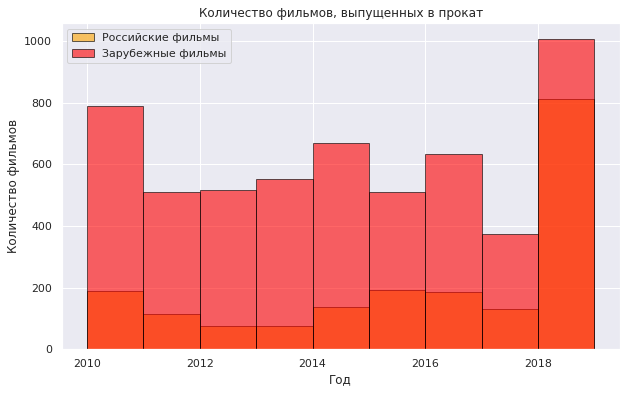

In [41]:
# Создаем маски для фильмов, произведенных в России и зарубежных фильмов
russian_films = data[data['primary_production_country'] == 'Россия']
foreign_films = data[data['primary_production_country'] != 'Россия']

# Строим гистограмму для всех фильмов
plt.figure(figsize=(10, 6))

# Гистограмма для фильмов, произведенных в России
plt.hist(russian_films['year'].dropna(), bins=range(int(data['year'].min()), int(data['year'].max()) + 1), edgecolor='black', alpha=0.6, label='Российские фильмы', color='orange')

# Гистограмма для зарубежных фильмов
plt.hist(foreign_films['year'].dropna(), bins=range(int(data['year'].min()), int(data['year'].max()) + 1), edgecolor='black', alpha=0.6, label='Зарубежные фильмы', color='red')

# Добавляем заголовок, подписи и легенду
plt.title('Количество фильмов, выпущенных в прокат')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.grid(True)
plt.legend()

plt.show()

С 2018 года заметен резкий рост Российских произведений вышедших в прокат.

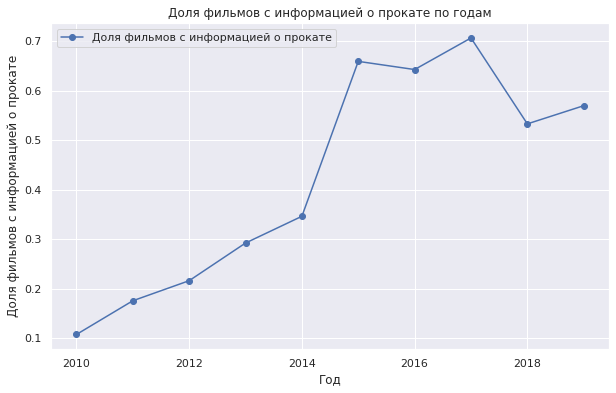

Доля фильмов с информацией о прокате по годам:
year
2010    0.107034
2011    0.175241
2012    0.215852
2013    0.292063
2014    0.346154
2015    0.659574
2016    0.643032
2017    0.706931
2018    0.533109
2019    0.569892
dtype: float64


In [42]:
# Считаем количество фильмов по годам
films_by_year = data.groupby('year').size()

# Считаем количество фильмов с информацией о прокате
films_with_box_office = data[data['box_office'].notna()].groupby('year').size()

# Рассчитываем долю фильмов с информацией о прокате по годам
share_with_box_office = films_with_box_office / films_by_year

# Визуализируем данные
plt.figure(figsize=(10, 6))
plt.plot(share_with_box_office.index, share_with_box_office.values, marker='o', color='b', label='Доля фильмов с информацией о прокате')
plt.title('Доля фильмов с информацией о прокате по годам')
plt.xlabel('Год')
plt.ylabel('Доля фильмов с информацией о прокате')
plt.grid(True)
plt.legend()
plt.show()

# Выводим статистику по годам
print(f"Доля фильмов с информацией о прокате по годам:")
print(share_with_box_office)

Видно, что доля фильмов с информацией о прокате растет. Период времени с 2015 года по 2019 может указывать о более полном представлении данных. В 2018 году заметно падение доли в сравнении с 2017 годом. Это может быть связано с выходом большого количества картин, которые не выходили в кинотеатре, а были доступны бесплатно в онлайн кинотеатрах. 

## Построим гистограмму суммы сборов по годам

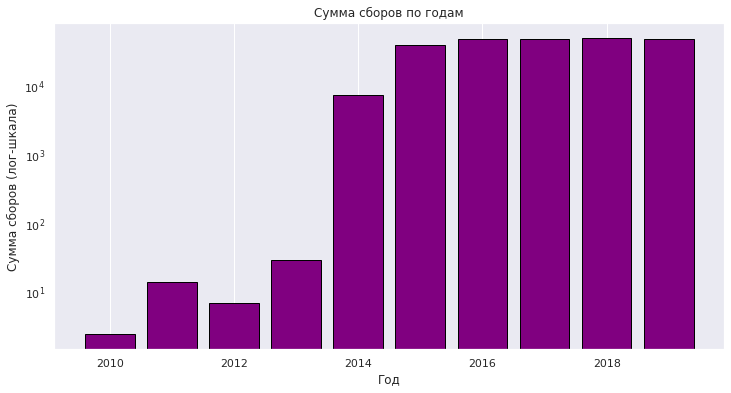

,year,total_box_office,film_count
0,2010,2.428654,105
1,2011,14.102765,109
2,2012,6.955423,128
3,2013,29.799706,184
4,2014,7444.951859,279
5,2015,39497.365196,465
6,2016,47866.299742,526
7,2017,48563.707218,357
8,2018,49668.403134,475
9,2019,48425.708780,530


In [43]:
# Создаем сводную таблицу
years_dynamic = data.pivot_table(index='year', values='box_office', aggfunc=['sum', 'count'])

# Преобразуем столбцы к обычному DataFrame
years_dynamic.columns = ['total_box_office', 'film_count']
years_dynamic = years_dynamic.reset_index()

# Построим гистограмму суммы сборов по годам
plt.figure(figsize=(12, 6))
plt.bar(years_dynamic['year'], years_dynamic['total_box_office'], color='purple', edgecolor='black')
plt.title('Сумма сборов по годам')
plt.xlabel('Год')
plt.ylabel('Сумма сборов (лог-шкала)')

# Используем логарифмическую шкалу
plt.yscale('log')

plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

years_dynamic

Минмальная сумма сборов была в 2010 году и составила 2,428,654 руб, а максимальная в 2018 и составила 49,668,403,134 руб. Для более полного анализа проверим динамику кассовых сбором относительно количества вышедших фильмов.

##  Построим гистограмму динамики кассовых сборов и количества фильмов по годам

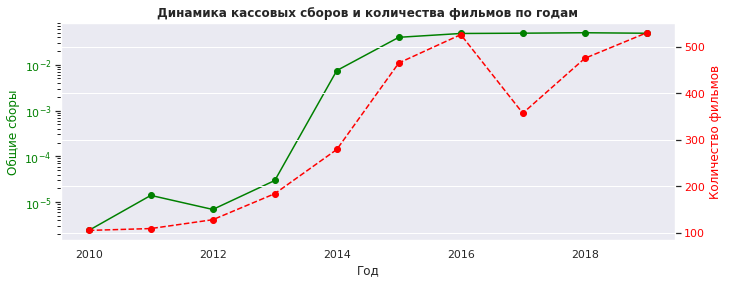

In [44]:
# Преобразуем столбцы в 1D массив
total_box_office = years_dynamic['total_box_office'].to_numpy() / 1e6
film_count = years_dynamic['film_count'].to_numpy()
years = years_dynamic['year']

# Создаем график
fig, ax1 = plt.subplots(figsize=(11, 4))

# Настройка первой оси (Общие сборы)
ax1.grid()
ax1.set_xlabel('Год')
ax1.set_ylabel('Общие сборы', color='green')
ax1.plot(years, total_box_office, linestyle='-', marker='o', color='green')
ax1.tick_params(axis='y', labelcolor='green')

ax1.set_yscale('log')

# Вторая ось (Количество фильмов)
ax2 = ax1.twinx()
ax2.set_ylabel('Количество фильмов', color='red')
ax2.plot(years, film_count, linestyle='--', marker='o', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Динамика кассовых сборов и количества фильмов по годам', fontweight="bold")
plt.show()

С 2014 года заметен резкий скачок по кассовым сборам. Это может быть связано с изменениеми в сборе статистики и улучшением точности данных в связи с развитием интернет ресурсов. Также, в 2017 году мы видим, что кассовые сборы относительно вышедших фильмов, заметно выше, в сравнении с другими годами.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

## Посчитаем среднюю и медианную сумму сборов для каждого года

,mean,median
,box_office,box_office
year,,
2010,0.023130,0.001700
2011,0.129383,0.003000
2012,0.054339,0.005660
2013,0.161955,0.003523
2014,26.684415,0.018160
2015,84.940570,4.920933
2016,91.000570,3.846679
2017,136.032793,9.968340


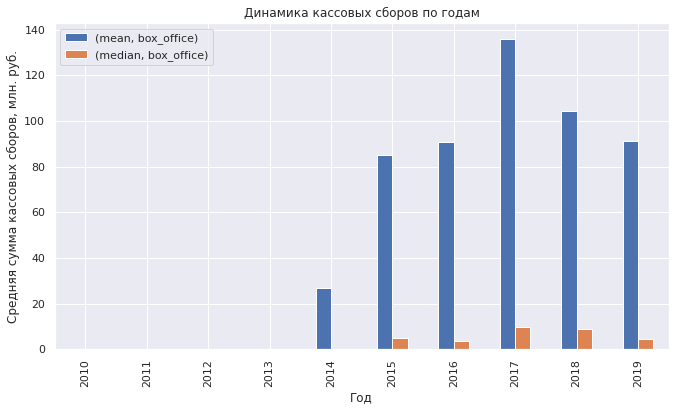

In [45]:
# Считаем среднюю сумму и медину кассовых сборов
years_box_office = data.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])
# Строим гистограмму
years_box_office.plot(kind='bar', figsize=(11, 6))
plt.grid(True)
plt.xlabel("Год")
plt.ylabel("Средняя сумма кассовых сборов, млн. руб.")
plt.title("Динамика кассовых сборов по годам");
plt.legend();
years_box_office

Видно, что среднее значение кассовых сборов значительно увеличилось с 2010 по 2019 год. Резкий рост наблюдается с 2014 года, что может быть связано с развитием индустрии, улучшением условий проката, появления новых технологий (например IMAX). При этом, на протяжении всего периода, медиана остается значительно низкой относительно среднего, что указывает на большие различия в доходах между фильмами. 

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

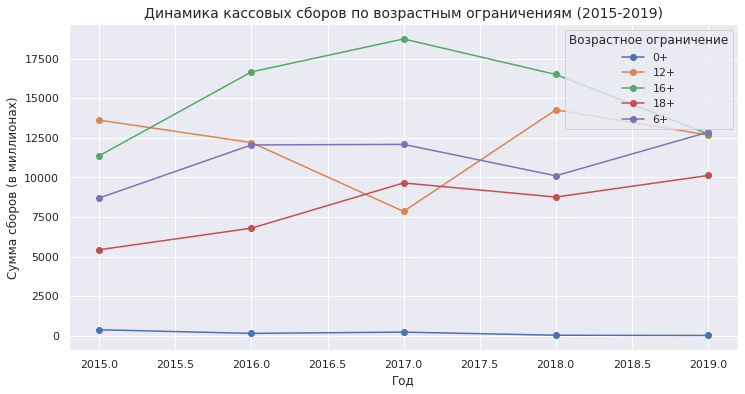

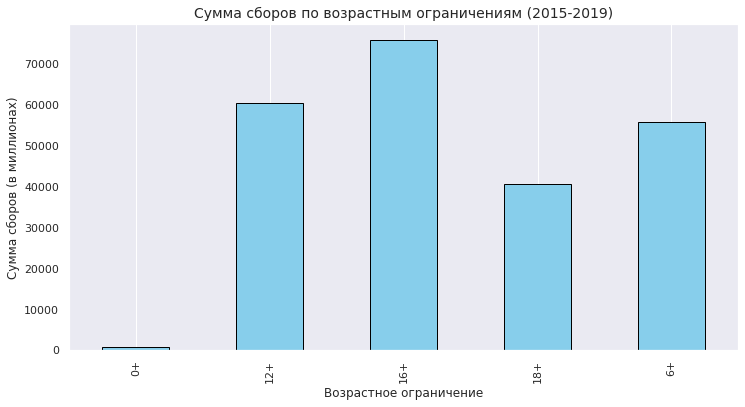

In [46]:
# Группируем по возрастным ограничениям и вычисляем суммарные или средние сборы
data_since_2015 = data[data['year'] > 2014]
age_restriction_stats = data_since_2015.groupby(['age_restriction', 'year'])['box_office'].sum().unstack().T

# График для суммарных сборов по возрастным категориям в разные годы
plt.figure(figsize=(12, 6))
for age_group in age_restriction_stats.columns:
    plt.plot(age_restriction_stats.index, age_restriction_stats[age_group], label=age_group, marker='o')

plt.title('Динамика кассовых сборов по возрастным ограничениям (2015-2019)', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Сумма сборов (в миллионах)', fontsize=12)
plt.legend(title='Возрастное ограничение')
plt.grid(True)
plt.show()

# 2. График для суммы сборов по возрастным категориям за весь период
avg_age_restriction_stats = data_since_2015.groupby('age_restriction')['box_office'].sum()

# График для средних сборов по возрастным ограничениям
plt.figure(figsize=(12, 6))
avg_age_restriction_stats.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Сумма сборов по возрастным ограничениям (2015-2019)', fontsize=14)
plt.xlabel('Возрастное ограничение', fontsize=12)
plt.ylabel('Сумма сборов (в миллионах)', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

Менее популярными оказались картины с ограничением 0+, так как они ограничены по количеству фильмов. 6+ категория принесла значительные сборы, поскольку фильмы для детей и семейного просмотра всегда востребованы. 12+ и 16+ - наиболее прибыльные возрастные категории с самыми высокими сборами, что может свидетельствовать о том, что фильмы для более зрелой и молодежной аудитории получают наибольшее внимание и являются коммерчески успешными. 18+ -  у фильмов с таким возрастным ограничением более ограниченная аудитория, что снижает общий сбор.

В период с 2016 - 2018 год видно, что картины с возрастным ограничением 16+ принесли больше всего денег. Это может быть связано с выходом фильмов по мотивам комиксов, которые очень популярны у этой категории зрителей.

# Вывод

Проведя исследовательский анализ данных мы выяснили:
1. С 2018 года заметен резкий рост Российских произведений вышедших в прокат.
2. Максимальную и минимальную сумму сборов по годам.
3. Увидели динамику кассовых сборов и количества фильмов по годам.
4. Посчитали медианную и среднюю долю сборов за каждый год.
5. Определили, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год.

На основе анализа данных о российском кинопрокате с 2010 по 2019 год можно сделать следующие выводы:

1. Рост количества фильмов и кассовых сборов: С 2014 года наблюдается резкий рост кассовых сборов, что может быть связано с улучшением методов сбора статистики, развитием интернет-ресурсов и общим ростом индустрии кино. Максимальные сборы были зафиксированы в 2018 году (49,668,403,134 руб), что свидетельствует о значительном увеличении популярности и коммерческой успешности российских фильмов.

2. Изменения в доле фильмов, выходящих в прокат: В 2018 году заметно падение доли фильмов, вышедших в кинотеатрах, по сравнению с 2017 годом. Это может быть связано с увеличением числа фильмов, доступных бесплатно в онлайн-кинотеатрах, что изменило структуру потребления кинопродукции.

3. Возрастные категории и коммерческая успешность: Наиболее прибыльными оказались фильмы с возрастными ограничениями 12+ и 16+, что указывает на высокий спрос среди молодежной и зрелой аудитории. Фильмы с ограничением 6+ также показали значительные сборы, благодаря популярности семейного и детского кино. В то же время фильмы с ограничением 18+ имеют более узкую аудиторию, что снижает их коммерческую привлекательность.

4. Различия в доходах между фильмами: На протяжении всего анализируемого периода медиана кассовых сборов остается значительно ниже среднего значения, что свидетельствует о большом разрыве в доходах между наиболее успешными и менее популярными фильмами. Это подчеркивает неравномерность распределения коммерческого успеха в индустрии.

5. Влияние технологий и жанров: Рост кассовых сборов с 2014 года может быть связан не только с улучшением условий проката, но и с внедрением новых технологий, таких как IMAX, а также с популярностью определенных жанров (например, фильмов по мотивам комиксов), которые привлекают широкую аудиторию.

Российская киноиндустрия с 2010 по 2019 год демонстрирует значительный рост, как в количестве выпускаемых фильмов, так и в кассовых сборах. Однако успех распределяется неравномерно: наиболее коммерчески успешными оказываются фильмы для молодежной и зрелой аудитории (12+ и 16+), а также семейные фильмы (6+). Развитие технологий и изменение потребительских привычек (переход к онлайн-просмотру) также оказывают существенное влияние на индустрию.

# Исследуем фильмы, которые получили государственную поддержку

## Общий анализ государственной поддержки

### Отберем фильмы с государственной поддержкой

In [47]:
supported_movies = data[(data['refundable_support'] > 0) | (data['nonrefundable_support'] > 0)].copy()

### Посчитаем общую сумму государственной поддержки

In [48]:
# Создадим столбец total_support, в котором будет сумма возвратных и безвозратных средств
supported_movies.loc[:, 'total_support'] = supported_movies['refundable_support'] + supported_movies['nonrefundable_support']

# Посчитаем суммарные расходы государства на поддержку кино
total_support_sum = supported_movies['total_support'].sum()
total_support_sum

20200.688312

Общая сумма государственной поддержки с 2010 года по 2019 год составила более 20 млрд рублей.

### Посчитаем долю фильмов с господдержкой от всех фильмов выпущенных Россией

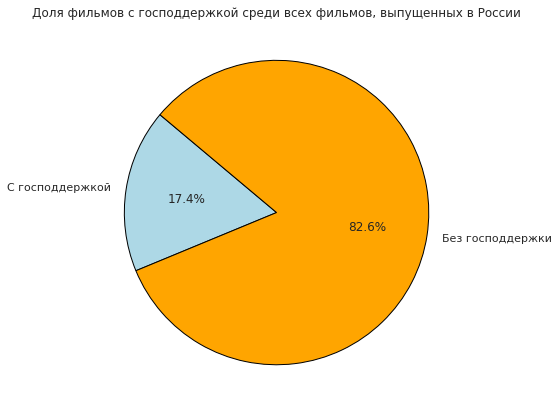

In [49]:
# Фильтруем только фильмы, произведенные в России
russian_movies = data[data['primary_production_country'] == 'Россия'].copy()
russian_movies.loc[:, 'total_support'] = russian_movies['refundable_support'] + russian_movies['nonrefundable_support']

# Определяем количество фильмов с господдержкой и без
count_supported = russian_movies[russian_movies['total_support'] > 0].shape[0]
count_not_supported = russian_movies[russian_movies['total_support'].isna()].shape[0]

# Данные для диаграммы
labels = ['С господдержкой', 'Без господдержки']
sizes = [count_supported, count_not_supported]
colors = ['lightblue', 'orange']

# Строим круговую диаграмму
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

# Заголовок
plt.title('Доля фильмов с господдержкой среди всех фильмов, выпущенных в России')

# Показываем график
plt.show()

Среди всех фильмов выпущенных Россией, только 17.4% получили господдержку.

### Динамика финансирования по годам

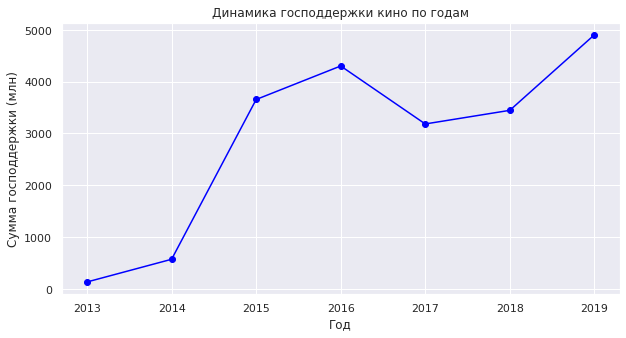

In [50]:
support_by_year = supported_movies.pivot_table(index='year', values='total_support', aggfunc='sum')

plt.figure(figsize=(10, 5))
plt.plot(support_by_year, marker='o', color='blue', linestyle='-')
plt.xlabel('Год')
plt.ylabel('Сумма господдержки (млн)')
plt.title('Динамика господдержки кино по годам')
plt.grid(True)
plt.show()

Данные о государственной поддержке имеются с 2013 года. На графике видно, что больше всего средств было выделено в 2019 году. Как раз с 2018 года был рост Российских фильмов вышедших в прокат.

### Топ-10 фильмов по размеру господдержки

In [51]:
# Выведем топ-10 фильмов, которые получили наибольшее финансирование
supported_movies[['title', 'year', 'total_support', 'box_office']].sort_values('total_support', ascending=False).head(10)

,title,year,total_support,box_office
7473,Вторжение,2019,500.000000,NaN
7463,Союз спасения,2019,500.000000,717.703186
3350,Дуэлянт,2016,450.000000,364.285140
2919,Экипаж,2016,442.104482,1402.255390
5652,Движение вверх,2017,400.000000,2779.686144
5568,Легенда о Коловрате,2017,350.000000,590.405065
3452,Ледокол,2016,300.000000,337.069663
5436,Матильда,2017,300.000000,511.775548
6886,Девятая,2019,300.000000,55.876887
7113,Тайна Печати Дракона,2019,270.000000,333.597060


## Окупаемость фильмов, получивших господдержку 

Средний ROI поддержанных фильмов: 0.85
Медианный ROI поддержанных фильмов: 0.18
Доля поддержанных фильмов, которые окупились: 25.60%


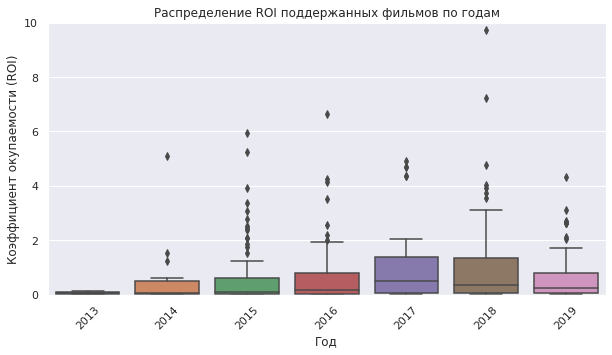

In [52]:
# Добавляем столбец с ROI (окупаемость)
supported_movies['ROI'] = supported_movies['box_office'] / supported_movies['budget']

# Убираем NaN, если бюджет был 0
supported_movies = supported_movies.replace(np.nan).dropna(subset=['ROI'])

# Средняя и медианная окупаемость
mean_roi = supported_movies['ROI'].mean()
median_roi = supported_movies['ROI'].median()

print(f'Средний ROI поддержанных фильмов: {mean_roi:.2f}')
print(f'Медианный ROI поддержанных фильмов: {median_roi:.2f}')

# Доля окупившихся фильмов
profitable_percent = (supported_movies['ROI'] > 1).mean() * 100
print(f'Доля поддержанных фильмов, которые окупились: {profitable_percent:.2f}%')

# График ROI по годам
plt.figure(figsize=(10, 5))
sns.boxplot(x=supported_movies['year'], y=supported_movies['ROI'])
plt.ylim(0, 10)  # Ограничим ось Y для наглядности (можно изменить)
plt.title('Распределение ROI поддержанных фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Коэффициент окупаемости (ROI)')
plt.xticks(rotation=45)
plt.show()

Средний ROI ниже 1. Это означает, что в среднем фильмы с господдержкой не окупаются. Медианный ROI указывает, что большинство фильмов имеют очень низкую окупаемость. Только 25.6% фильмов окупились, большинство фильмов - убыточные. Выбросы на графике указывают, что были редкие успешные проекты. Особенно много их было в 2015, 2016 и 2018 годах.

## Рейтинг фильмов с господдержкой

Средний рейтинг поддержанных фильмов: 6.02
Медианный рейтинг поддержанных фильмов: 6.20


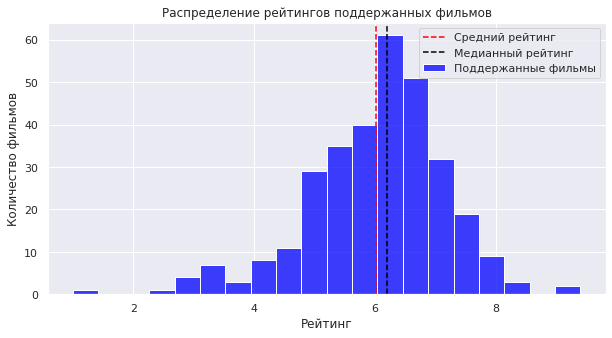

In [53]:
# Удалим фильмы с оценкой 0.0, чтобы они не исказили анализ
supported_movies = supported_movies[supported_movies['ratings'] > 0]

# Средний и медианный рейтинг поддержанных фильмов
mean_rating_supported = supported_movies['ratings'].mean()
median_rating_supported = supported_movies['ratings'].median()

print(f'Средний рейтинг поддержанных фильмов: {mean_rating_supported:.2f}')
print(f'Медианный рейтинг поддержанных фильмов: {median_rating_supported:.2f}')

# Построим гистограмму распределения рейтингов
plt.figure(figsize=(10, 5))
sns.histplot(supported_movies['ratings'], bins=20, color='blue', label='Поддержанные фильмы')
plt.axvline(mean_rating_supported, color='red', linestyle='dashed', label='Средний рейтинг')
plt.axvline(median_rating_supported, color='black', linestyle='dashed', label='Медианный рейтинг')
plt.legend()
plt.title('Распределение рейтингов поддержанных фильмов')
plt.xlabel('Рейтинг')
plt.ylabel('Количество фильмов')
plt.show()


Большинство фильмов получили оценки ниже 6.1, зрители оценивают эти фильмы как не очень качественные. 

## Распределение по жанрам фильмов с господдержкой

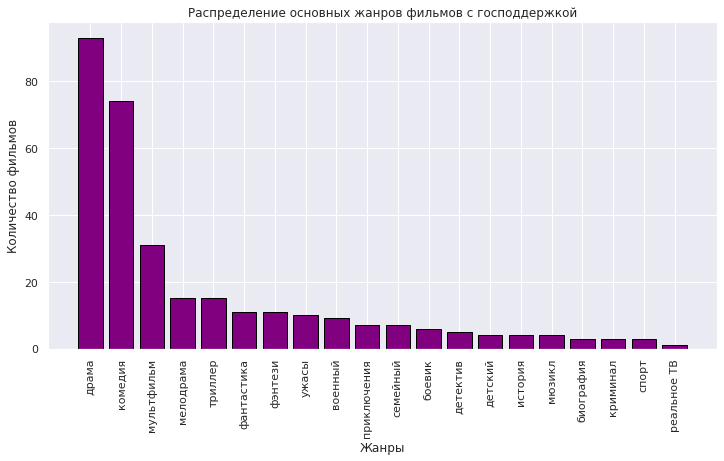

In [54]:
# Подсчитываем количество уникальных значений в столбце main_genre
genre_counts = supported_movies['main_genre'].value_counts()

# Преобразуем в DataFrame для удобства
genre_df = genre_counts.reset_index()
genre_df.columns = ['genre', 'count']

# Построим гистограмму
plt.figure(figsize=(12, 6))
plt.bar(genre_df['genre'], genre_df['count'], color='purple', edgecolor='black')
plt.title('Распределение основных жанров фильмов с господдержкой')
plt.xlabel('Жанры')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Самое большое количество фильмов получивших государственную поддержку имеют основные жанры "Драма" и "Комедия"

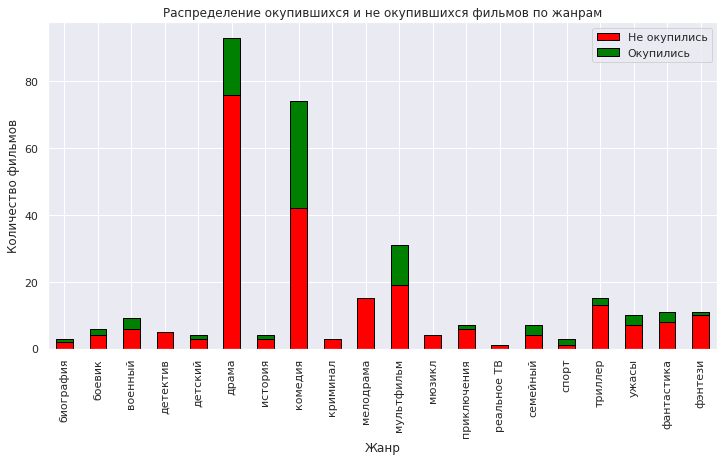

In [55]:
# Создаем столбец, который показывает, окупился ли фильм (roi > 1)
supported_movies['is_profitable'] = supported_movies['ROI'] > 1

# Группируем данные по жанрам и подсчитываем количество окупившихся и не окупившихся фильмов
profitability_by_genre = supported_movies.groupby(['main_genre', 'is_profitable']).size().unstack(fill_value=0)

# Построим гистограмму
profitability_by_genre.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'green'], edgecolor='black')

# Настроим график
plt.title('Распределение окупившихся и не окупившихся фильмов по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=90)
plt.legend(['Не окупились', 'Окупились'])
plt.grid(True)

# Отображаем график
plt.show()

По графику видно, что наиболее окупаемые фильмы - это комедии и семейные. Данные жанры имеют более широкую целевую аудиторию.

Исследовав фильмы, которые получили господдержку, мы узнали:
1. Общая сумма государственной поддержки с 2010 года по 2019 год составила более 20 млрд рублей.
2. Среди всех фильмов выпущенных Россией, только 17.4% получили господдержку.
3. Больше всего средств было выделено в 2019 году, а активное финансирование началось с 2015 года.
4. В среднем, фильмы с господдержкой не окупаются. Только 25.6% принесли какую-то прибыль или вышли в 0, большинство фильмов - убыточные. Были редкие успешные проекты, большая часть пришлась на 2015, 2016 и 2018 года.
5. Большинство фильмов получили оценки ниже 6.1, зрители оценивают эти фильмы как не очень качественные.
6. Самое большое количество фильмов получивших государственную поддержку имеют основные жанры "Драма" и "Комедия"
7. Наиболее окупаемые фильмы - это комедии и семейные. Данные жанры имеют более широкую целевую аудиторию.

# Общий вывод по исследованию российского кинопроката и господдержки фильмов (2010–2019)

1. Развитие индустрии кинопроката в России

За период с 2010 по 2019 год российская киноиндустрия демонстрировала значительный рост. Количество фильмов, выходящих в прокат, увеличивалось, а кассовые сборы показывали стабильную положительную динамику, особенно после 2014 года. В 2018 году был зафиксирован рекорд по кассовым сборам (более 49 млрд рублей). Такой рост может быть обусловлен:

 • Улучшением условий показа фильмов (новые технологии IMAX, 3D и расширение кинотеатральных сетей)
 • Ростом популярности отечественного кино среди зрителей

Однако в 2018 году было замечено снижение доли фильмов, вышедших в прокат, что может быть связано с ростом популярности онлайн-кинотеатров и изменением потребительских привычек зрителей.

2. Влияние возрастного рейтинга на коммерческую успешность

Наиболее прибыльными оказались фильмы с рейтингами 12+ и 16+ – именно они собрали наибольшую кассу. Это объясняется их ориентированностью на молодежную аудиторию, которая составляет значительную часть кинозрителей. Также успешными были семейные фильмы (6+), благодаря широкой аудитории (родители с детьми).
Фильмы с рейтингом 18+ оказались менее прибыльными, что связано с ограниченной целевой аудиторией.

3. Несоразмерность в кассовых сборах

Было выявлено, что среднее значение кассовых сборов значительно выше медианного, что говорит о большом разрыве между блокбастерами и менее популярными фильмами. Это подтверждает тренд на неравномерное распределение коммерческого успеха: небольшое количество успешных фильмов собирает основные кассовые сборы, в то время как большинство проектов остаются малозаметными.

4. Государственная поддержка кино

Исследование фильмов с господдержкой показало, что:

 • Общий объем финансирования с 2010 по 2019 год составил более 20 млрд рублей.
 • Только 17.4% российских фильмов получили финансовую поддержку от государства.
 • С 2015 года началось активное финансирование кинопроизводства, а пик поддержки пришелся на 2019 год.
 • Большинство фильмов с господдержкой не окупаются:
 • Только 25.6% смогли принести прибыль или выйти в ноль,
 • Остальные оказались убыточными.
 • Однако были отдельные успешные проекты, большинство из которых вышли в 2015, 2016 и 2018 годах.

5. Качество поддержанных государством фильмов

Зрительские оценки фильмов с господдержкой оказались невысокими:

 • Средний рейтинг – 5.73,
 • Медианный рейтинг – 6.10.
Большая часть фильмов получила оценки ниже 6.0, что говорит о недостаточном уровне качества или низкой популярности у зрителей. Это может быть связано с тем, что часть поддержанных фильмов создавалась не с коммерческими целями, а для выполнения социального или культурного заказа.

6. Жанровые предпочтения и окупаемость

 • Чаще всего господдержку получали драмы и комедии.
 • Самые окупаемые жанры – комедии и семейные фильмы. Это логично, так как они имеют более широкую аудиторию и привлекают зрителей разного возраста.
 • Драмы, несмотря на большое количество финансируемых проектов, часто оказываются менее коммерчески успешными.

Заключение

Российская киноиндустрия за 2010–2019 годы продемонстрировала рост кассовых сборов и увеличивающееся число фильмов в прокате, особенно после 2014 года. Однако рынок остается неравномерным: небольшое число успешных фильмов собирает основные доходы, в то время как большинство проектов остается в тени.

Фильмы с государственным финансированием составляют небольшую долю от общего числа российских фильмов, но значительная часть из них оказывается убыточной. При этом самые окупаемые проекты – это комедии и семейные фильмы, что подтверждает высокую коммерческую привлекательность этих жанров.

В дальнейшем стоит оптимизировать распределение государственной поддержки, делая акцент на качественные сценарии, режиссуру и продуманную маркетинговую стратегию, а также учитывать коммерческий потенциал жанра.